<a href="https://colab.research.google.com/github/paulcardozo/Parcial2_IA/blob/master/Parcial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Realice un proceso completo de análisis usando pipeline

# Subir el dataset
Haremos uso del dataset del repositorio de UCI respecto a tiempos de espera y la información para la respuesta de una cola de archivos que serán procesados en un servidor de arquitectura 2D-SOME Bus
https://archive.ics.uci.edu/ml/datasets/Optical+Interconnection+Network+

# Contenido Dataset


*   Node Number: Se refiere a la cantidad de nodos utilizados en el servirdor para lograr el procesamiento del archivo solicitado
*   Thread Number: Es el número de hilos creados para lograr el procesamiento
*   Spatial Distribution: El rendimiento de la red utilizada según los siguientes modelos: Uniform (UN), Hot Region (HR), Bit reverse (BR) and Perfect Shuffle (PS)
*   Temporal Distribution: Se refiere a la generación de los paquetes generados o recibidos por el servidor, estos pueden ser de tipo Client-Server o Asynchronous
*   T/R: Tiempo de transferencia del mensaje medidos en ciclos de cómputo
*   Processor Utilization: Un porcentaje de la cantidad utilizada del procesador
*   Channel Waiting Time: El tiempo de espera de un paquete en el canal de salida que llega al servidor hasta ser ejecutado
*   Input Waiting Time: El tiempo en que un paquete será ejecutado por el servidor
*   Network Response Time: El tiempo que el paquete se encuentra dentro de la red del servidor
*   Channel Utilization: El porcentaje del tamaño del canal que fue utilizado 


# Creación de Pipeline
Se realiza la creación de un pipeline, enfocado en el método de StandardScaler para el preprocesamiento, que da la escala apropiada para las variables discretas, y para el proceso de análisis se realizará DecisionTreeClassifier, para lograr procesar todas las variables necesarias

In [ ]:
import io
import pandas as pd
# El dataset estará cargado en el framework de pandas
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.pipeline import make_pipeline

url = 'https://raw.githubusercontent.com/paulcardozo/Parcial2_IA/master/optical_interconnection_network.csv'
dataset = pd.read_csv(url)
 
cleanup_data = {"Thread Number":{4:0,8:1},
        "Spatial Distribution":{"UN":0,"HR":1,"BR":2,"PS":3},
        "Temporal Distribution":{"Client-Server":0,"Asynchronous":1}}
dataset.replace(cleanup_data, inplace=True)
 
#Divide el dataset en los datos utilizados para encontrar el número de hilos
feature_cols = ['T/R', 'Temporal Distribution','Processor Utilization', 'Channel Waiting Time', 'Input Waiting Time','Network Response Time','Channel Utilization','Node Number']
X = dataset[feature_cols] # Features
y = dataset["Thread Number"] # Target variable
 
# Divide el dataset en una parte para el entrenamiento y el otro para realizar el test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% para entrenamiento y 30% test
 
 
# Crea el objeto de Clasificación en un Arbol de Desición de la librería sklearn
clf = DecisionTreeClassifier()

# se agrega en un pipeline los procesos de StandardScaler y el arbol de desición creado todos provenientes de la librería sklearn 
classifier = make_pipeline(StandardScaler(),clf)
 
classifier.fit(X_train,y_train)
print(X_test)
print()
y_pred = classifier.predict(X_test)
print(y_pred)

print("Precisión del Modelo:",metrics.accuracy_score(y_test, y_pred))

     T/R  Temporal Distribution  ...  Channel Utilization  Node Number
132  0.3                      0  ...             0.713385           64
622  0.3                      1  ...             0.808437           16
525  0.6                      1  ...             0.709583           16
289  1.0                      1  ...             0.872309           64
82   0.3                      0  ...             0.549167           64
..   ...                    ...  ...                  ...          ...
375  0.6                      0  ...             0.786875           16
76   0.7                      0  ...             0.774557           64
286  0.7                      1  ...             0.824323           64
347  0.8                      0  ...             0.932778           16
186  0.7                      1  ...             0.934853           64

[192 rows x 8 columns]

[ 6  1  0  0  0  0  0 10  1  1  6  0  1 10  1  6 10  6  1  6  6  0  6  1
  0  0 10 10  0  1  1  6  1  6  0  1  0 10  6  0 1

# Resultado
Cuando corremos el código del pipeline, sigue los procesos de preprocesamiento, a continuación del de análisis de datos. Con ello observamos en pantalla el dataset de prueba, y la predicción del número de hilos que se prevee utilizar según la implementación. También observamos la precisión de nuestro modelo con una precisión que ronda entre 80 y 85%

# 3. Haga una función en SQL Server o PostgreSQL que permita buscar un nombre y sus coincidencias, mostrando resultados por fila respecto del nombre consultado
Para la realización del ejercicio se hará uso de la plataforma PostgreSQL creando una función enfocada a una base de datos ejemplo, que contendrá una tabla alumno con único valor el del nombre del alumno.


Primero viene la función de búsqueda, que permite crear una tabla que llamaremos nombre, de acuerdo al nombre que se quiere encontrar en las columnas, y las coincidencias que encuentre entre el nombre de la tabla, y la cadena que queremos buscar se almacenará en las filas con el valor de 1 

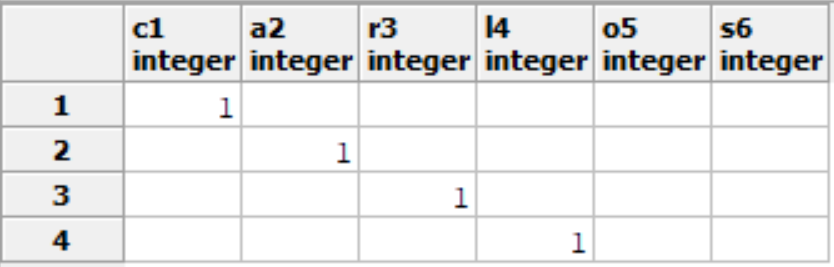

La función que crea esta tabla, nos devolverá un valor flotante, que significará, el número de coincidencias marcados con 1 entre el número de letras de la palabra con la que se compara, esto nos da un porcentaje de que tan parecidos son ambas palabras


```
create or replace function busqueda(cadena1 varchar,cadena2 varchar)
returns float
as
$$
declare
	beginSql varchar(100);
	longitud_cadena1 int;
	longitud_cadena2 int;
	contador int;
	contador2 int;
	contadorRes int;
	letra varchar(20);
	sql varchar(4000);
	sql2 varchar(4000);
	nombre varchar[];
	aux varchar;
	resultado float;
begin
	beginSql:='drop table nombre';
	execute beginSql;
	cadena1:=lower(cadena1);
	cadena2:=lower(cadena2);
	contador:=1;
	select char_length(cadena1) into longitud_cadena1;
	select char_length(cadena2) into longitud_cadena2;
	sql:='create table nombre (';
	loop 
		exit when contador>longitud_cadena1;
		letra:= concat(LEFT(cadena1,1),contador,' int,');
		cadena1:= RIGHT(cadena1,char_length(cadena1)-1);
		sql:=concat(sql,letra);
		contador:=contador+1;
	end loop;
	sql:= concat(LEFT(sql,char_length(sql)-1),')');
	execute sql;
	contador:=1;
	letra:='';
	nombre := ARRAY(SELECT COLUMN_NAME::varchar
		FROM INFORMATION_SCHEMA.COLUMNS
		WHERE TABLE_NAME = 'nombre'
		ORDER BY ORDINAL_POSITION);
	contador2:=1;
	contadorRes:=0;
	loop
		exit when contador > longitud_cadena2;
		letra:= LEFT(cadena2,1);
		cadena2:=RIGHT(cadena2,char_length(cadena2)-1);
		contador:=contador+1;
		sql2:='insert into nombre(';
		loop
			exit when contador2 > array_length(nombre,1);
			aux:=nombre[contador2]::varchar;
			aux:=LEFT(aux,1);
			if aux=letra then
				sql2:=concat(sql2,nombre[contador2],') values(1)');
				execute sql2;
				contador2:=contador2+1;
				contadorRes:=contadorRes+1;
				exit;
			end if;
			contador2:=contador2+1;
		end loop;
	end loop;
	resultado:=contadorRes::float / longitud_cadena1::float;
	return resultado;
end;
$$
LANGUAGE plpgsql
```
El link al código se encuentra en: https://github.com/paulcardozo/Parcial2_IA/blob/master/2PatternMatchFunction.sql



Finalmente para lograr hacer la búsqueda de una palabra entre toda la tabla, implementamos la función busquedaTabla utilizando la anterior función, y poniendo como parametro que, cualquier palabra que tenga más de 30% en similitud, será mostrada.

```
create or replace function busquedaTabla(cadena varchar)
	returns table(nombre varchar)
	language plpgsql
as
$$
begin
	return query
	select alumno.nombre
	from alumno
	where busqueda(alumno.nombre,cadena)>=0.3;
end;
$$
```

El link a la función está en: https://github.com/paulcardozo/Parcial2_IA/blob/master/2SearchFunction.sql

Cuando hacemos correr la función dentro la tabla ya creada con valores inicializados


```
select *
from busquedaTabla('carlitos')
```
Obtenemos como resultado


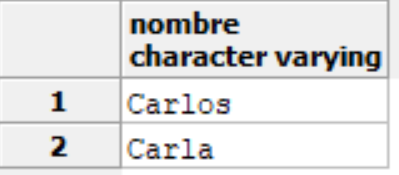